In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cubic_potentials as cp
from scipy.integrate import odeint
from scipy.interpolate import interp1d, interp2d
import importlib as im

In [124]:
sep = 500 

dat = np.load("efield_needle_2d_%dum.npz"%sep)
xvals, yvals = dat['x'], dat['y']
Ex, Ey = dat['Ex'], dat['Ey']

Ex_interp = interp2d(xvals[0,:], yvals[:,0], Ex)
Ey_interp = interp2d(xvals[0,:], yvals[:,0], Ey)

In [104]:
def Vneedle_func_duty(t, V, duty, T):
    """ V - voltage [V]
        duty -- duty cycle fraction
        T -- period in s
    """
    if(t%T < duty*T):
        return V
    else:
        return 0

In [192]:
def Vneedle_increasing(t, Vlist, ton, toff, tstep=1e-6):
    Vout = []
    for V in Vlist:
        Vout += int(toff/tstep)*[0]
        if(np.abs(V) < 100):
            div_fac = 1
        elif np.abs(V) < 1000:   
            div_fac = 10
        else:
            div_fac = 100
        Vout += int(ton*div_fac/tstep)*[V/div_fac]

    return np.array(Vout)

Curr iter 0, curr time 0.000000
In sphere!


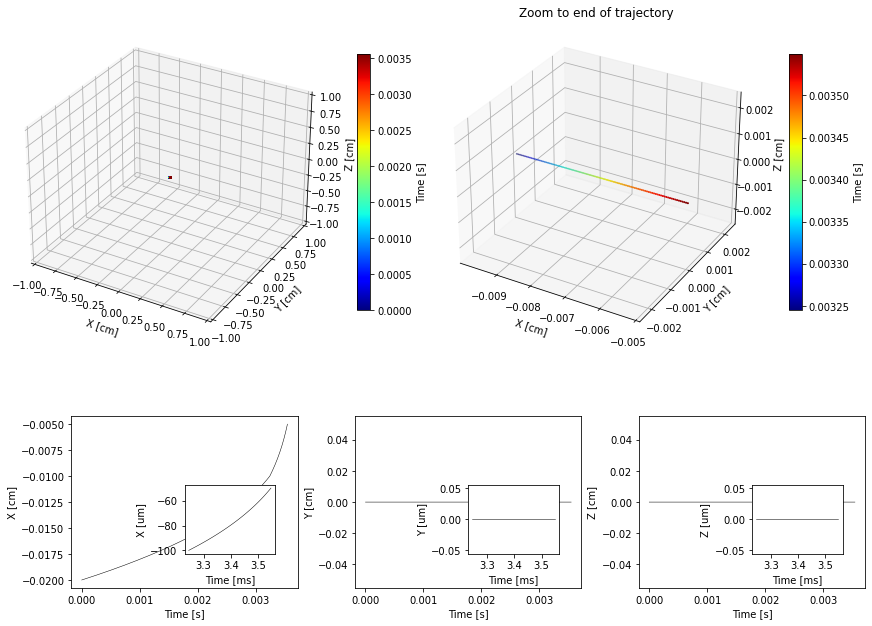

In [113]:
init_pos = [-0.02,0,0]
p = 10 ## mbar

mu = 100*(10/p) ## cm^2/Vs at 10 mbar
#Vneedle = lambda t: Vneedle_func_duty(t, 0, 0.001, 0.01) # V

v = Vneedle_increasing(t, Vlist, 10e-6, 1e-3)
t = np.arange(0, len(v)*1e-6, 1e-6)
Vneedle = interp1d(t, v)

im.reload(cp)

traj = cp.track_particle_to_needle(init_pos, mu, Ex_interp, Ey_interp, 1e-6, Vneedle, q_sphere=-100, needle_face=sep*1e-4)
title = "" #"P = %d mbar, $f_{AC}$ = %.1f kHz, $V_{AC}$ = %d V,\n $q_{sph}$ = %d $e$, Init. pos = (%.1f,%.1f,%.1f) cm"%(p, fAC/1e3, VAC, q_sphere, *init_pos)
cp.plot3Dtraj(traj, title=title)

[ -0.          -7.82731335 -21.35636188]


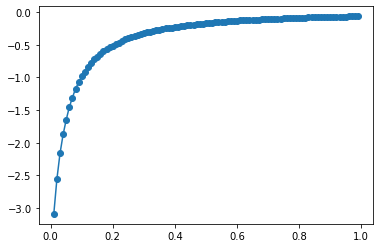

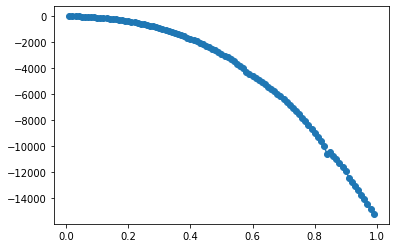

In [179]:
xvec = np.linspace(-2, 0, 100)
dt = 10e-6 ## 10 us pulse
mu = 100 ## cm^2/Vs
dx = np.arange(0.01, 1, 0.01)
xvals = -1.0*dx

ex = np.zeros_like(dx)
for j, d in enumerate(dx):
    ex[j]=Ex_interp(-d, 0)

Vlist = dx/(dt*mu*ex)

plt.figure()
plt.plot(dx, ex, 'o-')

plt.figure()
plt.plot(dx, Vlist, 'o-')

print(V)

In [173]:
Ex_interp(-0.5,0)

array([-0.17171371])

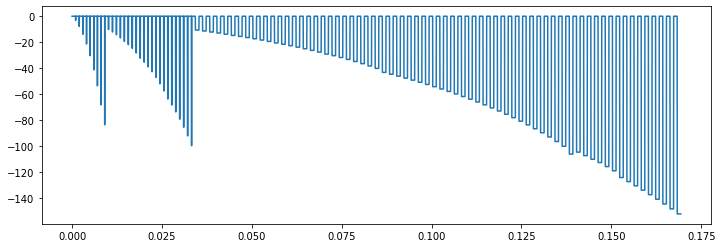

In [193]:
v = Vneedle_increasing(t, Vlist, 10e-6, 1e-3)

t = np.arange(0, len(v)*1e-6, 1e-6)

plt.figure(figsize = (12,4))
plt.plot(t, v)